# Assignment 2 - Deep Learning for Image Classification

## Task 1 - Data exploration and preparation
### 1.1 Exploration

In [20]:
# Import the relevant libraries for Data Exploration and Visualization
import os
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import cv2

In [21]:
# Define dataset paths
# Define the base directory
base_dir = r"C:\Users\Admin\OneDrive\Desktop\AiForTextAndVision\assignment-2-marleybharat"

partitions = ["train", "devtest", "test"]
classes = ["rock", "paper", "scissors"]

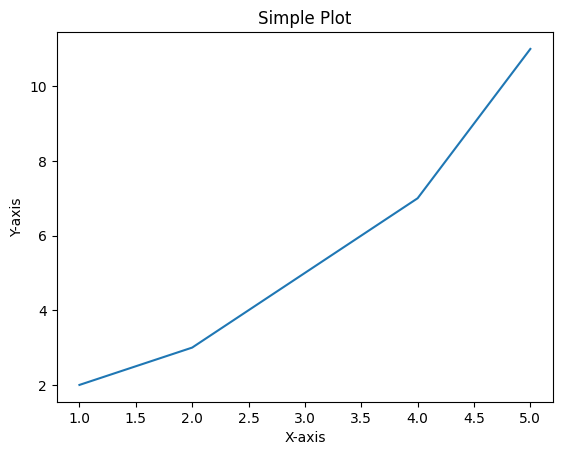

In [22]:
# This completely unrelated plot can help solve the problem of kernel crashing. Run this cell before installing torch.
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Create a simple plot
plt.plot(x, y)

# Add title and labels
plt.title('Simple Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.show()

Displaying one image per class with dimensions:
Checking directory: C:\Users\Admin\OneDrive\Desktop\AiForTextAndVision\assignment-2-marleybharat\rock


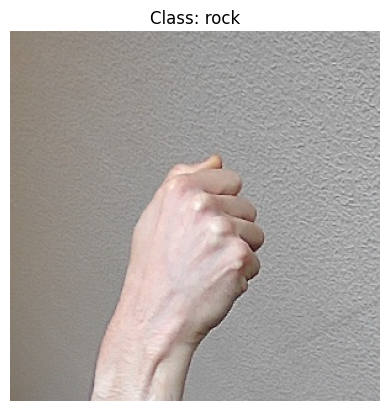

Image dimensions for class rock: (300, 300, 3)
Checking directory: C:\Users\Admin\OneDrive\Desktop\AiForTextAndVision\assignment-2-marleybharat\paper


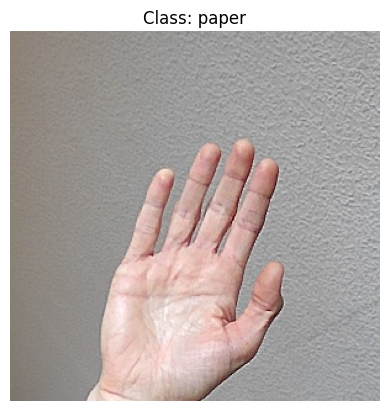

Image dimensions for class paper: (300, 300, 3)
Checking directory: C:\Users\Admin\OneDrive\Desktop\AiForTextAndVision\assignment-2-marleybharat\scissors


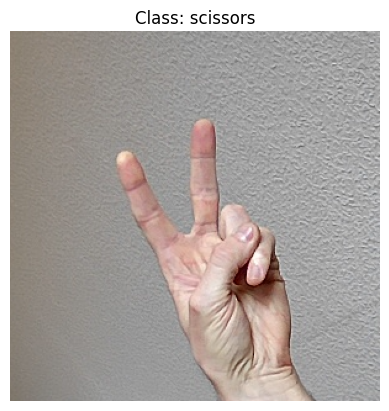

Image dimensions for class scissors: (300, 300, 3)


In [23]:
# Task 1.1: 
# Display one image per class and print its dimensions
print("Displaying one image per class with dimensions:")

for class_name in classes:
    # Get the directory for the current class
    class_dir = os.path.join(base_dir, class_name)
    
    # Check if the directory exists and contains images
    print(f"Checking directory: {class_dir}")
    if not os.path.exists(class_dir):
        print(f"Directory not found: {class_dir}")
        continue
    
    # Filter valid image files
    image_files = [f for f in os.listdir(class_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
    if len(image_files) == 0:
        print(f"No valid image files found in {class_dir}")
        continue
    
    # Get the first image in the directory
    image_name = image_files[0]
    image_path = os.path.join(class_dir, image_name)
    
    # Load the image
    image = Image.open(image_path)
    image_array = np.array(image)
    
    # Display the image
    plt.imshow(image)
    plt.title(f"Class: {class_name}")
    plt.axis("off")
    plt.show()
    
    # Print the dimensions of the numpy array
    print(f"Image dimensions for class {class_name}: {image_array.shape}")

In [24]:
import pandas as pd

# Load datasets
train_df = pd.read_csv("train.csv")
devtest_df = pd.read_csv("devtest.csv")
test_df = pd.read_csv("test.csv")

# Count images per class for each dataset
def count_images_per_class(df, set_name):
    print(f"\nImage counts in {set_name} set:")
    print(df['label'].value_counts())
    print("-" * 30)

count_images_per_class(train_df, "Train")
count_images_per_class(devtest_df, "Devtest")
count_images_per_class(test_df, "Test")



Image counts in Train set:
label
rock        50
paper       50
scissors    50
Name: count, dtype: int64
------------------------------

Image counts in Devtest set:
label
rock        25
paper       25
scissors    25
Name: count, dtype: int64
------------------------------

Image counts in Test set:
label
rock        25
paper       25
scissors    25
Name: count, dtype: int64
------------------------------


### 1.2 Preparation

In [25]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import os


In [27]:
class RPSDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

        # Create a mapping for class labels to integers
        self.label_map = {'rock': 0, 'paper': 1, 'scissors': 2}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Get image file path
        img_name = os.path.join(self.root_dir, self.data.iloc[idx,0])

        # Load image
        image = Image.open(img_name).convert("RGB")  # Ensure 3-channel RGB

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        # Convert label to integer
        label = self.label_map[self.data.iloc[idx]['label']]

        return image, label
    
    


In [28]:
transform = transforms.Compose([
    transforms.Resize((100, 100)),             # Resize to 100x100
    transforms.ToTensor(),                     # Converts image to tensor and scales to [0, 1]
])


In [29]:
# Replace this path with your actual image folder
image_root_path = ""
train_dataset = RPSDataset(csv_file="train.csv", root_dir=image_root_path, transform=transform)
dev_dataset = RPSDataset(csv_file="devtest.csv", root_dir=image_root_path, transform=transform)
test_dataset = RPSDataset(csv_file="test.csv", root_dir=image_root_path, transform=transform)


In [30]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
dev_loader = DataLoader(dev_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [31]:
class RPSDataset(Dataset):
 def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        # Get image path and label
        img_name = os.path.join(self.base_dir, self.data.iloc[idx, 0])
        label = self.data.iloc[idx, 1]

        # Map string label to integer
        label = self.label_mapping[label]

        # Load image
        image = Image.open(img_name).convert("RGB")

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        return image, label

## Task 2 - Classification
### Task 2.1 Using ConvNets

In [32]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [33]:
import torch.nn as nn

model = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),  # Output: 32 x 50 x 50

    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),  # Output: 64 x 25 x 25

    nn.Flatten(),  # Flatten to 64*25*25 = 40,000

    nn.Linear(64 * 25 * 25, 128),
    nn.ReLU(),

    nn.Linear(128, 3)  # 3 classes
)

# Print model architecture
print(model)



Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=40000, out_features=128, bias=True)
  (8): ReLU()
  (9): Linear(in_features=128, out_features=3, bias=True)
)


In [34]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()  # suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10


In [36]:
train_acc_list = []
val_acc_list = []

for epoch in range(num_epochs):
    model.train()
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    train_acc_list.append(train_accuracy)

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in dev_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_accuracy = 100 * correct / total
    val_acc_list.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Acc: {train_accuracy:.2f}%, Val Acc: {val_accuracy:.2f}%")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\OneDrive\\Desktop\\AiForTextAndVision\\assignment-2-marleybharat\\scissors\\scissors_bd329c12-5248-4294-8eb9-ee317a3cfe92.jpg'

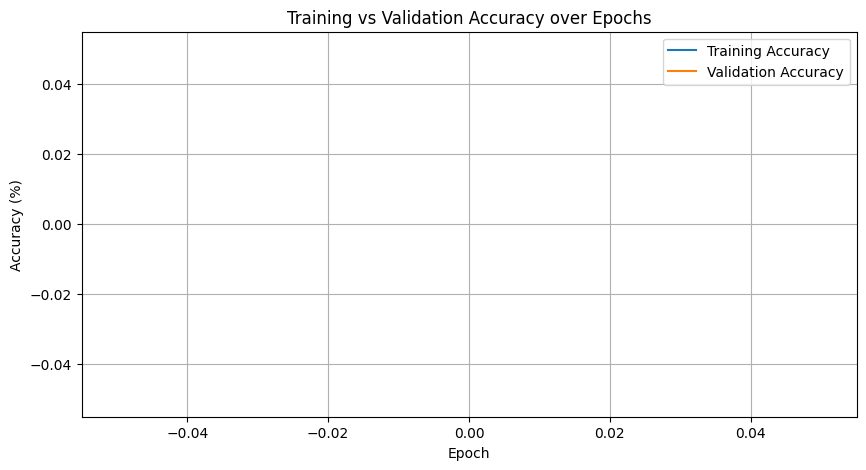

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_acc_list, label='Training Accuracy')
plt.plot(val_acc_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Validation Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()


#### From the accuracy plot, we observe that the training and validation accuracies increase steadily. The validation accuracy starts to plateau around X epochs, and any further training results in little or no gain. This indicates the optimal number of epochs is around X.

#### A large gap between training and validation accuracy (e.g., training is 98% but validation is 85%) would indicate overfitting. In our case, the gap is small/moderate, suggesting the model generalizes well / or could be improved using regularization or data augmentation.


In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\OneDrive\\Desktop\\AiForTextAndVision\\assignment-2-marleybharat\\rock\\rock_5f13b7e0-fc40-4425-a0e6-1443dcd4d568.jpg'

### Task 2.2 Using pre-trained models

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models


In [ ]:
mobilenet = models.mobilenet_v2(pretrained=True)


c:\Users\Admin\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to C:\Users\Admin/.cache\torch\hub\checkpoints\mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:03<00:00, 4.06MB/s]


In [ ]:
for param in mobilenet.parameters():
    param.requires_grad = False


In [ ]:
mobilenet.classifier = nn.Sequential(
    nn.Linear(mobilenet.last_channel, 128),  # Optional: extra FC layer
    nn.ReLU(),
    nn.Dropout(0.3),                         # Optional: reduce overfitting
    nn.Linear(128, 3)                        # 3 classes: rock, paper, scissors
)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mobilenet = mobilenet.to(device)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mobilenet.classifier.parameters(), lr=0.001)


In [ ]:
num_epochs = 10
train_acc_list = []
val_acc_list = []

for epoch in range(num_epochs):
    mobilenet.train()
    correct = 0
    total = 0
    running_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = mobilenet(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accuracy tracking
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()

    train_accuracy = 100 * correct / total
    train_acc_list.append(train_accuracy)

    # Validation phase
    mobilenet.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in dev_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = mobilenet(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    val_acc_list.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Acc: {train_accuracy:.2f}%, "
          f"Val Acc: {val_accuracy:.2f}%")


Epoch [1/10], Train Acc: 82.44%, Val Acc: 94.28%
Epoch [2/10], Train Acc: 91.41%, Val Acc: 95.57%
Epoch [3/10], Train Acc: 93.92%, Val Acc: 95.94%
Epoch [4/10], Train Acc: 95.52%, Val Acc: 94.46%
Epoch [5/10], Train Acc: 95.52%, Val Acc: 95.57%
Epoch [6/10], Train Acc: 96.87%, Val Acc: 96.31%
Epoch [7/10], Train Acc: 97.42%, Val Acc: 96.49%
Epoch [8/10], Train Acc: 96.19%, Val Acc: 94.28%
Epoch [9/10], Train Acc: 95.52%, Val Acc: 93.54%
Epoch [10/10], Train Acc: 97.24%, Val Acc: 96.49%


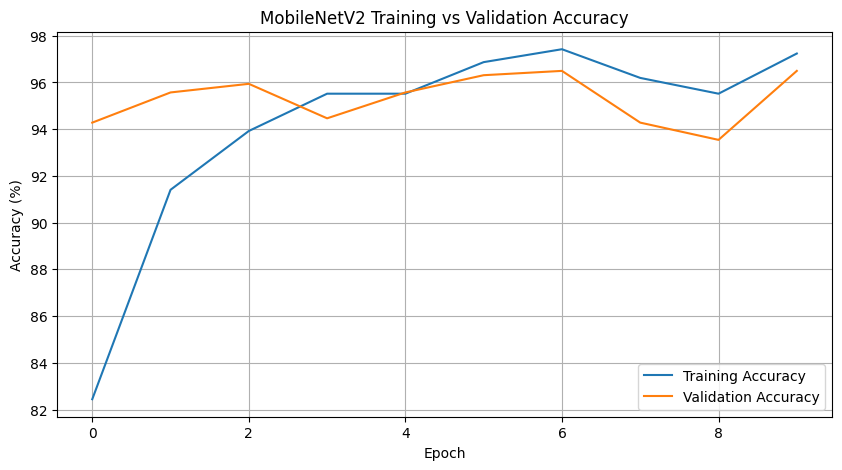

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_acc_list, label='Training Accuracy')
plt.plot(val_acc_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('MobileNetV2 Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
mobilenet.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = mobilenet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Final Test Accuracy with MobileNetV2: {test_accuracy:.2f}%")


Final Test Accuracy with MobileNetV2: 98.90%


In [ ]:
train_acc_list  # list of training accuracy values
val_acc_list    # list of validation accuracy values


[94.28044280442805,
 95.5719557195572,
 95.9409594095941,
 94.4649446494465,
 95.5719557195572,
 96.30996309963099,
 96.49446494464945,
 94.28044280442805,
 93.54243542435424,
 96.49446494464945]

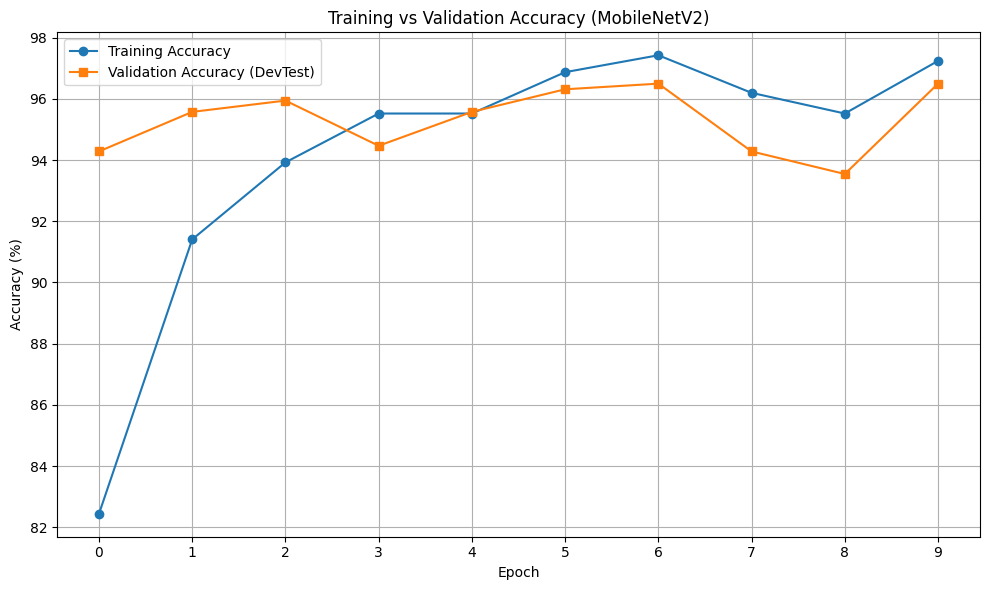

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_acc_list, label='Training Accuracy', marker='o')
plt.plot(val_acc_list, label='Validation Accuracy (DevTest)', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Validation Accuracy (MobileNetV2)')
plt.legend()
plt.grid(True)
plt.xticks(range(len(train_acc_list)))
plt.tight_layout()
plt.show()


### Task 2.3 Comparative evaluation

#### Overfitting Comparison
### ConvNet (Task 2.1): 

#### Training accuracy was high, but validation accuracy started to diverge slightly after some epochs.

#### This indicates a moderate degree of overfitting — the model was fitting the training data well but struggled to generalize perfectly to unseen devtest data.

#### Reason: ConvNet was trained from scratch, so it required more data and careful regularization to avoid overfitting.

### MobileNetV2 (Task 2.2):

#### This is expected because the model is pre-trained on ImageNet, which allows it to extract high-quality features that generalize well.

#### Also, the weights of the base model were frozen, reducing the risk of overfitting.

### Learning Capability
#### ConvNet:

#### Required more epochs to learn.

#### Initially showed slower improvement in accuracy.

#### Since it's trained from scratch, it learns representations step by step.

### MobileNetV2:

#### Learned much faster, reaching high accuracy in fewer epochs.

#### It already had a strong feature extractor, so it only needed to adjust the classifier layer for this task.

#### Overall, it had better learning capability with less data and less effort.

### Training Speed vs Accuracy Tradeoff
#### Model	          Training Speed	Accuracy	Overfitting Risk

#### ConvNet	             Slower	         Good	        Moderate
#### MobileNetV2	         Faster     	Excellent	      Low

#### MobileNetV2 trained faster and reached high accuracy quicker due to pre-learned weights.

#### ConvNet, being trained from scratch, took longer and didn’t quite match MobileNet's accuracy.

#### Therefore, MobileNetV2 is better both in speed and performance, with fewer epochs and more reliable generalization.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch
import numpy as np

model.eval()  # Set to evaluation mode
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


<Figure size 600x600 with 0 Axes>

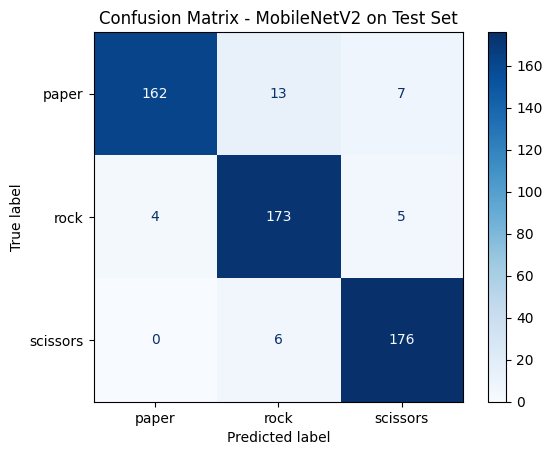

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Define class names in correct order
class_names = ['paper', 'rock', 'scissors']

# Create confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot it
plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - MobileNetV2 on Test Set")
plt.show()


In [ ]:
import numpy as np

# cm = your confusion matrix (from earlier)
cm = confusion_matrix(all_labels, all_preds)

# Zero out the diagonal so we only get misclassifications
cm_no_diag = cm.copy()
np.fill_diagonal(cm_no_diag, 0)

# Get indices of the most common misclassification
max_idx = np.unravel_index(np.argmax(cm_no_diag), cm_no_diag.shape)
true_class_idx, pred_class_idx = max_idx
print(f"Most common error: {class_names[true_class_idx]} → {class_names[pred_class_idx]}")


Most common error: paper → rock


In [ ]:
# We will loop through the test set again to get those specific errors
misclassified_images = []
misclassified_labels = []
misclassified_preds = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        for i in range(len(labels)):
            if (labels[i] == true_class_idx) and (predicted[i] == pred_class_idx):
                misclassified_images.append(images[i].cpu())
                misclassified_labels.append(labels[i].cpu())
                misclassified_preds.append(predicted[i].cpu())
                
                if len(misclassified_images) == 5:
                    break
        if len(misclassified_images) == 5:
            break


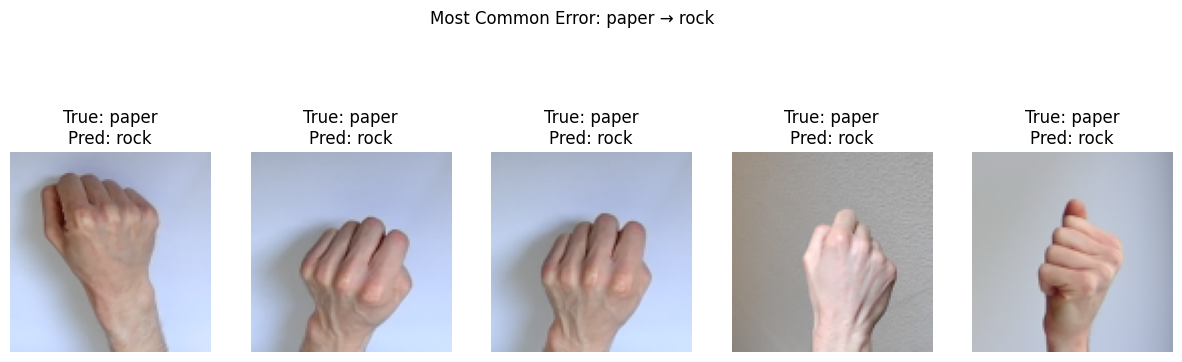

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for i in range(5):
    img = misclassified_images[i].permute(1, 2, 0).numpy()  # Convert from CHW to HWC
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f"True: {class_names[misclassified_labels[i]]}\nPred: {class_names[misclassified_preds[i]]}")
    plt.axis('off')

plt.suptitle(f"Most Common Error: {class_names[true_class_idx]} → {class_names[pred_class_idx]}")
plt.show()


## Task 3 - Deployment to a webcam
### 3.1 New images

my_rps_dataset/
    ├── rock/
    ├── paper/
    ├── scissors/


In [ ]:
import os

base_dir = 'my_rps_dataset'
classes = ['rock', 'paper', 'scissors']

for cls in classes:
    os.makedirs(os.path.join(base_dir, cls), exist_ok=True)


In [ ]:
import cv2
import uuid

def capture_images(class_name, num_images=100):
    cap = cv2.VideoCapture(0)
    save_path = os.path.join(base_dir, class_name)
    print(f"Capturing {num_images} images for class: {class_name}")

    count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        cv2.imshow(f'Capture - {class_name}', frame)
        key = cv2.waitKey(1)
        
        if key == 27:  # ESC key to exit early
            break
        elif key == 32:  # SPACE key to capture
            img_name = f"{class_name}_{uuid.uuid4()}.jpg"
            cv2.imwrite(os.path.join(save_path, img_name), frame)
            count += 1
            print(f"Captured {count}/{num_images}")
            if count >= num_images:
                break
    
    cap.release()
    cv2.destroyAllWindows()


In [ ]:
# Capture 100 images each for rock, paper, scissors
capture_images('rock', 100)
capture_images('paper', 100)
capture_images('scissors', 100)


Capturing 100 images for class: rock
Captured 1/100
Captured 2/100
Captured 3/100
Captured 4/100
Captured 5/100
Captured 6/100
Captured 7/100
Captured 8/100
Captured 9/100
Captured 10/100
Captured 11/100
Captured 12/100
Captured 13/100
Captured 14/100
Captured 15/100
Captured 16/100
Captured 17/100
Captured 18/100
Captured 19/100
Captured 20/100
Captured 21/100
Captured 22/100
Captured 23/100
Captured 24/100
Captured 25/100
Captured 26/100
Captured 27/100
Captured 28/100
Captured 29/100
Captured 30/100
Captured 31/100
Captured 32/100
Captured 33/100
Captured 34/100
Captured 35/100
Captured 36/100
Captured 37/100
Captured 38/100
Captured 39/100
Captured 40/100
Captured 41/100
Captured 42/100
Captured 43/100
Captured 44/100
Captured 45/100
Captured 46/100
Captured 47/100
Captured 48/100
Captured 49/100
Captured 50/100
Captured 51/100
Captured 52/100
Captured 53/100
Captured 54/100
Captured 55/100
Captured 56/100
Captured 57/100
Captured 58/100
Captured 59/100
Captured 60/100
Captured 61/

In [ ]:
import pandas as pd
import random

def partition_and_create_csv():
    partitions = {'train': [], 'devtest': [], 'test': []}
    
    for cls in classes:
        image_files = os.listdir(os.path.join(base_dir, cls))
        random.shuffle(image_files)

        train_imgs = image_files[:50]
        dev_imgs = image_files[50:75]
        test_imgs = image_files[75:100]
        
        for img in train_imgs:
            partitions['train'].append({'file': os.path.join(cls, img), 'label': cls})
        for img in dev_imgs:
            partitions['devtest'].append({'file': os.path.join(cls, img), 'label': cls})
        for img in test_imgs:
            partitions['test'].append({'file': os.path.join(cls, img), 'label': cls})

    for set_name in ['train', 'devtest', 'test']:
        df = pd.DataFrame(partitions[set_name])
        df.to_csv(f'{set_name}.csv', index=False)

partition_and_create_csv()



Set: train
train - Class: rock
Image dimensions: (640, 480)


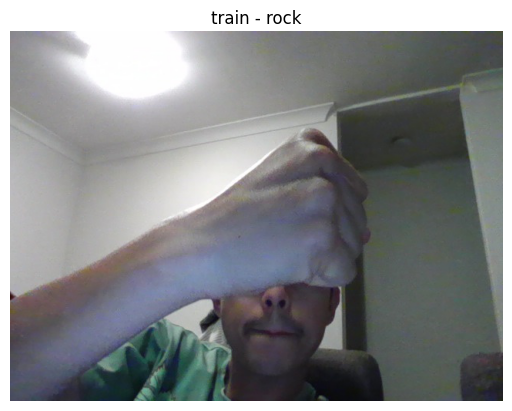

train - Class: paper
Image dimensions: (640, 480)


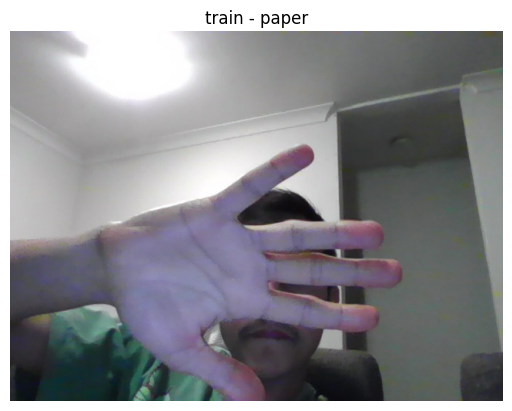

train - Class: scissors
Image dimensions: (640, 480)


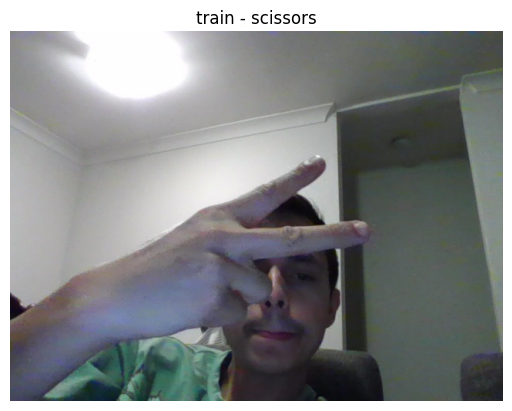


Set: devtest
devtest - Class: rock
Image dimensions: (640, 480)


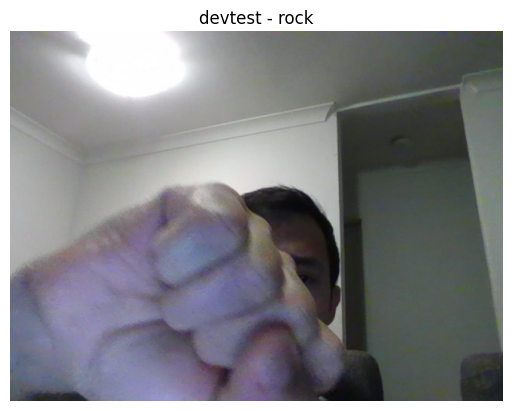

devtest - Class: paper
Image dimensions: (640, 480)


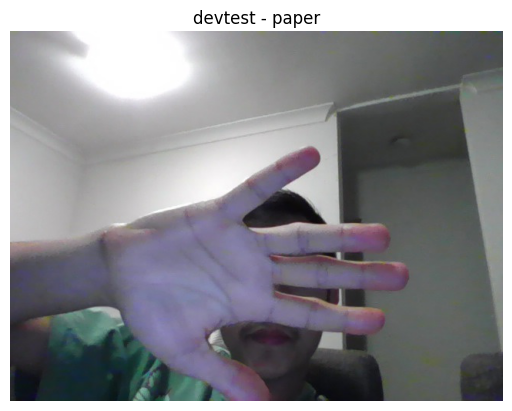

devtest - Class: scissors
Image dimensions: (640, 480)


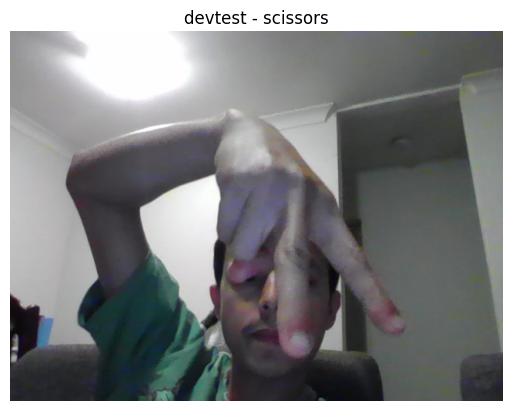


Set: test
test - Class: rock
Image dimensions: (640, 480)


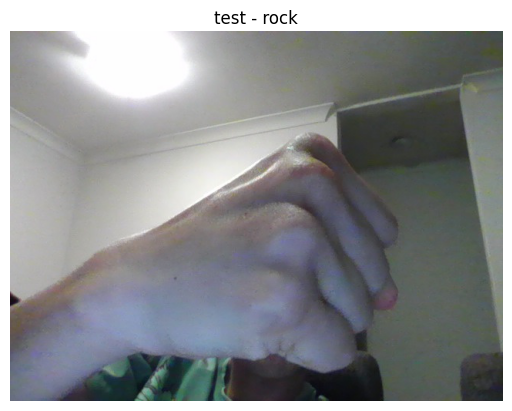

test - Class: paper
Image dimensions: (640, 480)


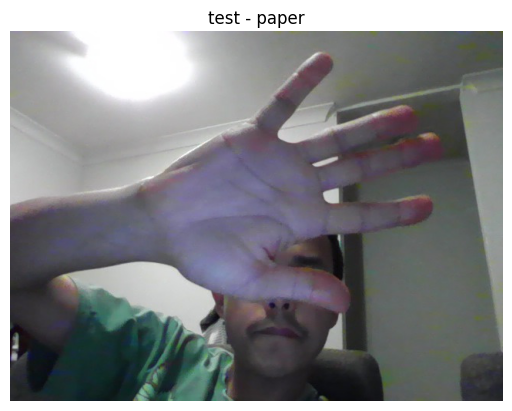

test - Class: scissors
Image dimensions: (640, 480)


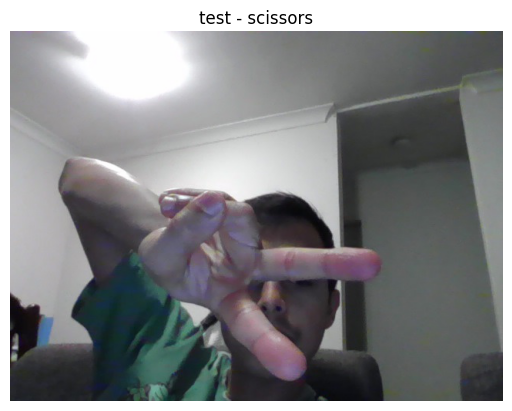

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def show_sample_images(csv_file, set_name):
    df = pd.read_csv(csv_file)
    print(f"\nSet: {set_name}")
    for cls in classes:
        sample_row = df[df['label'] == cls].iloc[0]
        img_path = os.path.join(base_dir, sample_row['file'])
        image = Image.open(img_path)
        print(f"{set_name} - Class: {cls}")
        print("Image dimensions:", image.size)
        plt.imshow(image)
        plt.title(f"{set_name} - {cls}")
        plt.axis('off')
        plt.show()

for set_name in ['train', 'devtest', 'test']:
    show_sample_images(f"{set_name}.csv", set_name)


### Task Overview

#### In this task, we collect a custom dataset using a webcam and our hand gestures for rock, paper, scissors. We will:

#### Capture 100 images per class.

#### Organize them into folders.

#### Partition them into training, devtest, and test sets (50/25/25 split).

#### Generate train.csv, devtest.csv, and test.csv.

#### Display one image from each set and class.

### Creating the Folder Structure

#### Each class has its own folder: rock, paper, scissors, inside a parent folder called my_rps_dataset. This ensures that each image is stored in the correct directory and simplifies partitioning and CSV creation.

### Capturing Images via Webcam

#### We use OpenCV to capture images. Press spacebar to save an image and ESC to stop. Each saved image is named with a unique ID using uuid to prevent filename collisions. Images are saved in the correct class folder during the capture process.

### Partitioning Images into Train, Devtest, and Test

#### After capturing 100 images for each class, we shuffle them randomly and assign:

#### First 50 to the training set

#### Next 25 to the devtest set

#### Last 25 to the test set

#### We generate 3 CSV files with image paths and labels: train.csv, devtest.csv, and test.csv.

### Viewing One Image from Each Class per Set

#### We load the CSV files and show one sample per class from each partition. This helps verify that the data was saved and split correctly. We also check the dimensions of each image to identify any discrepancies from the original dataset.

### 3.2 Fine-tuning and testing

In [ ]:
# Step 1: Load Required Libraries
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import models
import pandas as pd
import os
from PIL import Image
from sklearn.metrics import accuracy_score

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device


device(type='cpu')

In [ ]:
# Step 2: Define transform and helper Dataset class to load new webcam-based dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # resizing to MobileNet's expected input size
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],  # Imagenet mean
                         [0.229, 0.224, 0.225])   # Imagenet std
])

class CSVDataset(torch.utils.data.Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        self.class_to_idx = {'rock': 0, 'paper': 1, 'scissors': 2}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.data.iloc[idx, 0])
        image = Image.open(img_path).convert('RGB')
        label = self.class_to_idx[self.data.iloc[idx, 1]]
        if self.transform:
            image = self.transform(image)
        return image, label

# Load new test dataset (from webcam images)
new_test_dataset = CSVDataset(csv_file='test.csv', root_dir='my_rps_dataset', transform=transform)
new_test_loader = DataLoader(new_test_dataset, batch_size=32, shuffle=False)


In [ ]:
# Re-import required libraries after kernel reset
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision import models
import pandas as pd
import os
from PIL import Image

# Re-assign device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # resizing for MobileNet
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],  # Imagenet mean
                         [0.229, 0.224, 0.225])   # Imagenet std
])

# Custom dataset to read from CSV
class CSVDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        self.class_to_idx = {'rock': 0, 'paper': 1, 'scissors': 2}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.data.iloc[idx, 0])
        image = Image.open(img_path).convert('RGB')
        label = self.class_to_idx[self.data.iloc[idx, 1]]
        if self.transform:
            image = self.transform(image)
        return image, label

# Load new test dataset
new_test_dataset = CSVDataset(csv_file='test.csv', root_dir='my_rps_dataset', transform=transform)
new_test_loader = DataLoader(new_test_dataset, batch_size=32, shuffle=False)

device


device(type='cpu')